#**Applied Data Science - Capstone Project**

##**The Battle of the Neighbourhoods**
##**Identifying the safest borough in London and exploring its neighbourhoods**





---



<h2><b>Index</b></h2>



*   **Introduction**
*   **Libraries**
*   **Data**
*   **Methodology**
*   **Exploratory Data Analysis (EDA)**
*   **Kingston upon Thames**
*   **Modelling**
*   **Clustering**
*   **Visualizing the Clusters**
*   **Analysis of Clusters**
*   **Results**
*   **Discussion**
*   **Conclusion**





---



####**Introduction**

#####**Business Problem :**
The main objective of this project is to gather and study the Crime Data for boroughs in London and ultimately identify the safest borough among them. Any person or family who is considering to relocate to London will be benefited from this analysys. Safety being a major concern whenever moving to a new place, it is important to identify and select a better suitable borough to ensure a safe stay and avoid loss of money, time or risk their safety. The crime statistics will surely give us enough insights to get a solution to this problem. 

After identifying the safest borough, we will focus on the various venues in the neighbourhoods in that bororugh. We will identify the most common venues and cluster the neighbourhoods later into similar groups, using k-means clustering, so that the user can get enough information about the nature of the venues in any particular neighbourhood and select one that is most suitable to him or her.


#####**Data**
Considering the nature of our problem, the main data required will be the crime dataset for the boroughs in London and the venues data for each neighbourhood which we will use in the later part of the project. 
The data is collected from various sources and combined wherever it is required.

1. [London Crime Data](https://www.kaggle.com/jboysen/london-crime)
    
    The London Crime Dataset consists of crime data for each borough in London from the year 2008 to 2016. We are interested in the latest crime statistics so we will be pre-processing the data to get the relevant records.

    Data Attributes :
    - lsoa_code: code for Lower Super Output Area in Greater London.
    - borough: Common name for London borough.
    - major_category: High level categorization of crime
    - minor_category: Low level categorization of crime within major category.
    - value: monthly reported count of categorical crime in given borough
    - year: Year of reported counts, 2008-2016
    - month: Month of reported counts, 1-12


  


####**Importing Required Libraries**

In [1]:
!pip install geocoder

In [2]:
import requests # library to handle requests
import pandas as pd 
import numpy as np 
import random
from bs4 import BeautifulSoup # library for web scrapping  

import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium

print('Libraries imported.')

Libraries imported.


#####**FourSquare Credentials**

In [3]:
CLIENT_ID = 'M02N5UZKERNJHBFGWTL1IRKSWQHYDO10KSFW1Z2OW3VQTZKH'
CLIENT_SECRET = '0MDBC2T4R5WEYSYKSK5AHV5WUD1EHXR4O3TW0DCLNJURHI3I'

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M02N5UZKERNJHBFGWTL1IRKSWQHYDO10KSFW1Z2OW3VQTZKH
CLIENT_SECRET: 0MDBC2T4R5WEYSYKSK5AHV5WUD1EHXR4O3TW0DCLNJURHI3I


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####**Data**

In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/london_crime_by_lsoa.csv")
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
df.count()

lsoa_code         13490604
borough           13490604
major_category    13490604
minor_category    13490604
value             13490604
year              13490604
month             13490604
dtype: int64

**Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
print(df['value'].unique())
print(df['year'].unique())

[  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 286 258 182 175 198 262 251 236 300 21

In [9]:
# Selecting only the values for latest year (2016)
df.drop(df.index[df['year'] != 2016], inplace = True) 
# Removing records with value 0
df = df[df.value != 0]

# Reset the index
df = df.reset_index(drop=True)

In [10]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [11]:
df.count()

lsoa_code         392042
borough           392042
major_category    392042
minor_category    392042
value             392042
year              392042
month             392042
dtype: int64

In [12]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   LSOA_Code       392042 non-null  object
 1   Borough         392042 non-null  object
 2   Major_Category  392042 non-null  object
 3   Minor_Category  392042 non-null  object
 4   No_of_Crimes    392042 non-null  int64 
 5   Year            392042 non-null  int64 
 6   Month           392042 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


**Total Boroughs**

In [14]:
df['Borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

In [15]:
df['Borough'].unique().shape

(33,)

**Count of Crimes per Major Category**

In [16]:
df['Major_Category'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: Major_Category, dtype: int64

The most prominent categories of crime are
 - Theft and Handling
 - Violence Against the Person

Pivotting df dataframe to generate Creating London_crime dataframe to summarize total crimes for each major category for every borough.

In [17]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)

London_crime.reset_index(inplace = True)
London_crime.head()

Borough  ...                No_of_Crimes
Major_Category                        ... Violence Against the Person
0               Barking and Dagenham  ...                        6067
1                             Barnet  ...                        7499
2                             Bexley  ...                        4503
3                              Brent  ...                        9205
4                            Bromley  ...                        6650

[5 rows x 8 columns]

Creating a 'Total' column to get the total number of crimes per borough

In [18]:
London_crime['Total'] = London_crime.sum(axis=1)

In [19]:
London_crime.columns = London_crime.columns.map(''.join)

London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
                        
London_crime

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164
5,Camden,2652,1935,1493,490,899,14088,7626,29183
6,City of London,2,2,10,6,4,129,25,178
7,Croydon,2738,3219,1367,718,1139,9229,10302,28712
8,Ealing,2492,2562,1355,613,669,10040,9396,27127
9,Enfield,2541,2136,1063,492,807,8037,7409,22485


In [20]:
London_crime.shape

(33, 9)

Now we have cleaned data ready for London Crime Data



2. [London Boroughs](https://en.wikipedia.org/wiki/List_of_London_boroughs)

  The additional data for London Boroughs is scraped from Wikipedia using Beautiful Soup. We can attain the latitude and longitude values for the Boroughs.

In [21]:
wiki_link = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
wiki_page_raw = requests.get(wiki_link).text

soup = BeautifulSoup(wiki_page_raw,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"21ff903f-6d29-4574-bd66-12047e10e556","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

In [22]:
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Ha

Now we have obtained the table of our interest from the wikipedia page, we now convert it into a pandas dataframe.

In [23]:
London_boroughs_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_boroughs_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [24]:
# The second table on the page contains the details for 'City of London'
# We convert this table into a dataframe as well

London_boroughs_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Renaming the columns to match the columns with London_boroughs_table

London_boroughs_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

London_boroughs_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [25]:
# Append both tables
London_boroughs_table = London_boroughs_table.append(London_boroughs_table1, ignore_index = True) 
London_boroughs_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [26]:
London_boroughs_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [27]:
London_boroughs_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borough                   33 non-null     object 
 1   Inner                     4 non-null      object 
 2   Status                    5 non-null      object 
 3   Local authority           33 non-null     object 
 4   Political control         33 non-null     object 
 5   Headquarters              33 non-null     object 
 6   Area (sq mi)              33 non-null     float64
 7   Population (2013 est)[1]  33 non-null     int64  
 8   Co-ordinates              33 non-null     object 
 9   Nr. in map                33 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


**Data Cleaning**

In [28]:
London_boroughs_table = London_boroughs_table.replace('note 1','', regex=True) 
London_boroughs_table = London_boroughs_table.replace('note 2','', regex=True) 
London_boroughs_table = London_boroughs_table.replace('note 3','', regex=True) 
London_boroughs_table = London_boroughs_table.replace('note 4','', regex=True) 
London_boroughs_table = London_boroughs_table.replace('note 5','', regex=True)

London_boroughs_table.shape

(33, 10)

We now have this dataframe cleaned but in order to merge it with the London_crime, the Borough values should exactly match for both dataframes.  We will check the columns that are now exactly similar in this case using set()

In [29]:
set(London_boroughs_table.Borough) - set(London_crime.Borough)

{'Barking and Dagenham []', 'Greenwich []', 'Hammersmith and Fulham []'}

In [30]:
# Finding the index for these Boroughs
print(London_boroughs_table.index[London_boroughs_table['Borough'] == 'Barking and Dagenham []'])
print(London_boroughs_table.index[London_boroughs_table['Borough'] == 'Greenwich []'])
print(London_boroughs_table.index[London_boroughs_table['Borough'] == 'Hammersmith and Fulham []'])

Int64Index([0], dtype='int64')
Int64Index([9], dtype='int64')
Int64Index([11], dtype='int64')


The indices are [0], [9] ,[11]

In [31]:
# Renaming the concerned values

London_boroughs_table.iloc[0,0] = 'Barking and Dagenham'
London_boroughs_table.iloc[9,0] = 'Greenwich'
London_boroughs_table.iloc[11,0] = 'Hammersmith and Fulham'

In [32]:
set(London_boroughs_table.Borough) - set(London_crime.Borough)

set()

Now as our 'Borough' columns match for both dataframes, we can merge these two dataframes to form a combined dataframe

In [33]:
London_crime_merged = pd.merge(London_crime, London_boroughs_table, on='Borough')
London_crime_merged.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [34]:
list(London_crime_merged)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Other Notifiable Offences',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [35]:
columns_titles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

London_crime_merged = London_crime_merged.reindex(columns=columns_titles)

London_crime_merged = London_crime_merged[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

London_crime_merged.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,1287,1949,919,378,534,5607,6067,16741
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,3402,2183,906,499,464,9731,7499,24684
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,1123,1673,646,294,209,4392,4503,12840
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,2214,2202,728,417,369,7584,6650,20164


####**Methodology**

The following part of the project involves visualizing the London Crime Dataset (EDA) that we have created by combining data from multiple sources. Analyzing the data, we can conclude to identify the safest borough in London

The later part would include scraping data for the neighbourhoods in the identified borough and exploring the venues for each neighbourhood. Using K-means clustering algorithm, similar neighbourhoods can be identified based on most common venues. 

#####**Exploratory Data Analysis (EDA)**

In [36]:
London_crime_merged.describe()

,Area (sq mi),Population (2013 est)[1],Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,18.408485,255026.878788,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970
std,12.645367,71891.280393,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749
min,1.120000,7000.000000,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000
25%,10.360000,215667.000000,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000
50%,14.520000,263386.000000,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000
75%,21.780000,310516.000000,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000
max,57.970000,372752.000000,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [37]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

import matplotlib.cm as cm
import matplotlib.colors as colors

In [38]:
London_crime_merged.columns = list(map(str, London_crime_merged.columns))
all(isinstance(column, str) for column in London_crime_merged.columns)

True

In [39]:
df_view = London_crime_merged[['Borough','Total']]

In [40]:
df_view.set_index('Borough',inplace = True)

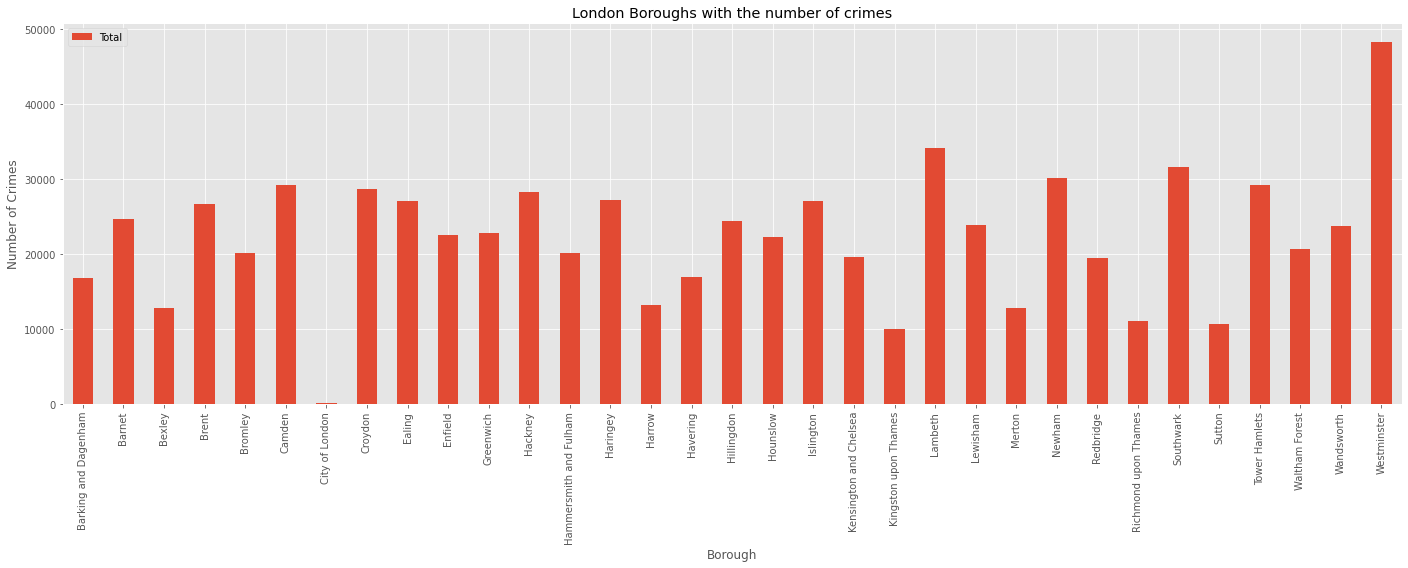

In [41]:
ax = df_view.plot(kind='bar', figsize=(24, 7), rot=1)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('London Boroughs with the number of crimes')
plt.xticks(rotation=90)

plt.show()


Sorting the data in ascending order to get the boroughs with least number of crimes

In [42]:
London_crime_merged.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_view_least = London_crime_merged.head() 
df_view_least

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,2,2,10,6,4,129,25,178
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,879,1054,743,189,121,3803,3194,9983
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,1233,1316,461,253,165,3516,3714,10658
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,1359,1148,320,217,106,4769,3155,11074
23,Merton,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,1419,1418,466,249,283,4894,4026,12755


In [43]:
df_visualize_least = df_view_least[['Borough','Total']]

Visualizing the boroughs with least number of crimes. 

In [44]:
df_visualize_least.set_index('Borough',inplace = True)

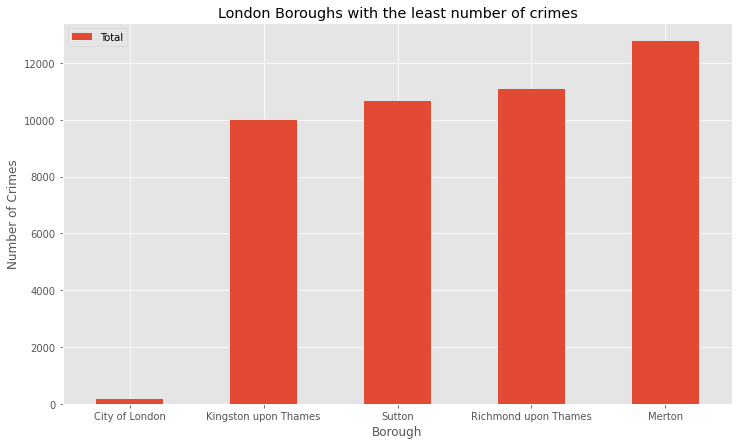

In [45]:
ax = df_visualize_least.plot(kind='bar', figsize=(12, 7), rot=0)
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('London Boroughs with the least number of crimes')
#plt.xticks(rotation=90)

plt.show()

In [46]:
df_city = df_view_least[df_view_least['Borough'] == 'City of London']
df_city = df_city[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_city

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,178,1.12,7000


As per the information available on wikipedia.org , City of London administratively forms one of the 33 local authority districts of London; however, the [**City of London is not a London borough**](https://en.wikipedia.org/wiki/City_of_London).

Since, City of London is not a London Borough, we will select the next borough in the order.


####**Kingston upon Thames**

In [47]:
df_kut =  df_view_least[df_view_least['Borough'] == 'Kingston upon Thames']

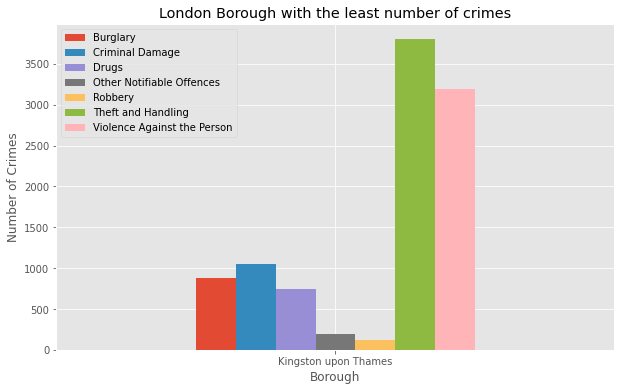

In [48]:
df_kut_c = df_kut[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_kut_c.set_index('Borough',inplace = True)

ax = df_kut_c.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('London Borough with the least number of crimes')

plt.show()

**Here, we can conclude that Kingston upon Thames is the safest borough in London.**


---


We will further explore this borough.



---
3. **Neighbourhoods in Kingston upon Thames**
  
    In this part, we will create data specific to our identified safest borough.
    The list of all neighbourhoods in this boroughs can be obtained from [this Wikipedia page](https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames).
    We will now create a dataframe to store all the relevant data.


In [49]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames','Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames']
Borough = Borough*15

Latitude = []
Longitude = []

# we will fill the Latitude and Longitude values using Google Maps API geocoding

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [50]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neigh = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neigh

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [51]:
address = 'Kingston upon Thames,London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Kinston upon Thames, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Kinston upon Thames, London are 51.4096275, -0.3062621.


We have calculated the central co-ordinates of Kingston upon Thames Borough.

---

We will now create a map using **folium** to visualize the borough Kingston upon Thames.

In [52]:
map_kut = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neigh['Latitude'], kut_neigh['Longitude'], kut_neigh['Borough'], kut_neigh['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kut)  
    
map_kut

####**Modelling**

We will be using Foursquare API to get the venues for each neighbourhood. We will group the venues as per their neighbourhood and later use K - Means Clustering to determine clusters.

In [53]:
# Function to get the venues for neighbourhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
df_kut_venues = getNearbyVenues(names=kut_neigh['Neighborhood'],
                                   latitudes=kut_neigh['Latitude'],
                                   longitudes=kut_neigh['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [55]:
df_kut_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub


In [56]:
print(df_kut_venues.shape)
df_kut_venues.groupby('Neighborhood').count()

(170, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,14,14,14,14,14,14
Coombe,1,1,1,1,1,1
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,9,9,9,9,9,9




---

We have retrieved 170 venues among all the neighbourhoods. Above table shows the count of venues for each of the neighbourhood. 

---



In [63]:
print('There are {} uniques categories of venues.'.format(len(df_kut_venues['Venue Category'].unique())))
df_kut_venues['Venue Category'].unique()

There are 67 uniques categories of venues.


array(['Gym / Fitness Center', 'Park', 'Bus Stop', 'Pub', 'Café', 'Hotel',
       'Fish & Chips Shop', 'Plaza', 'Supermarket', 'Indian Restaurant',
       'Shop & Service', 'Spa', 'Health & Beauty Service', 'Bakery',
       'Market', 'Theater', 'Record Shop', 'Burger Joint',
       'Cosmetics Shop', 'German Restaurant', 'French Restaurant',
       'Cajun / Creole Restaurant', 'Department Store', 'Thai Restaurant',
       'Coffee Shop', 'Furniture / Home Store', 'Portuguese Restaurant',
       'Beer Bar', 'Sushi Restaurant', 'Electronics Store', 'Gift Shop',
       'Asian Restaurant', 'Turkish Restaurant', 'Mexican Restaurant',
       'Bar', 'Sandwich Place', 'Soccer Field', 'Grocery Store',
       'Garden Center', 'Restaurant', 'Gym', 'Korean Restaurant',
       'Gastropub', 'Chinese Restaurant', 'Japanese Restaurant',
       'Italian Restaurant', 'Breakfast Spot', 'Seafood Restaurant',
       'Pharmacy', 'Pizza Place', 'Food', 'Rental Car Location',
       'Fried Chicken Joint', 'Hard

In order to convert categorical values to numeric values, we use One Hot Encoding for all the venue categories.

In [64]:
kut_onehot = pd.get_dummies(df_kut_venues[['Venue Category']], prefix="", prefix_sep="")

kut_onehot['Neighborhood'] = df_kut_venues['Neighborhood'] 

# move neighborhood column to the first place
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Market,Mexican Restaurant,Park,Pet Café,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped.head()

,Neighborhood,Asian Restaurant,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Deli / Bodega,Department Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Market,Mexican Restaurant,Park,Pet Café,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Wine Shop
0,Berrylands,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Canbury,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.071429,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.071429,0.0,0.285714,0.0,0.0,0.0,0.00,0.0,0.071429,0.00,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Coombe,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hook,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kingston Vale,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0              Bus Stop  0.33
1  Gym / Fitness Center  0.33
2                  Park  0.33
3      Asian Restaurant  0.00
4                 Plaza  0.00


----Canbury----
            venue  freq
0             Pub  0.29
1           Hotel  0.07
2     Supermarket  0.07
3            Park  0.07
4  Shop & Service  0.07


----Coombe----
                     venue  freq
0  Health & Beauty Service   1.0
1                      Pub   0.0
2                    Hotel   0.0
3        Indian Restaurant   0.0
4       Italian Restaurant   0.0


----Hook----
               venue  freq
0        Supermarket  0.25
1             Bakery  0.25
2  Indian Restaurant  0.25
3  Fish & Chips Shop  0.25
4               Park  0.00


----Kingston Vale----
              venue  freq
0               Bar  0.25
1     Grocery Store  0.25
2    Sandwich Place  0.25
3      Soccer Field  0.25
4  Asian Restaurant  0.00


----Kingston upon Thames----
              venue  freq
0         

Sorting venues in descending order

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Displaying the top 10 venues for each neighborhood

In [68]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Wine Shop
1,Canbury,Pub,Hotel,Spa,Plaza,Fish & Chips Shop,Café,Indian Restaurant,Shop & Service,Park,Supermarket
2,Coombe,Health & Beauty Service,Wine Shop,Furniture / Home Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Garden Center
3,Hook,Bakery,Fish & Chips Shop,Indian Restaurant,Supermarket,Wine Shop,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food,French Restaurant
4,Kingston Vale,Grocery Store,Bar,Sandwich Place,Soccer Field,Gift Shop,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Department Store


####**Clustering using K-Means Clustering Algorithm**

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kut_test_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(kut_test_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(kut_test_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.478586717927533
For n_clusters=3, The Silhouette Coefficient is 0.2338199496272104
For n_clusters=4, The Silhouette Coefficient is 0.21487311975592352
For n_clusters=5, The Silhouette Coefficient is 0.1791911564893766
For n_clusters=6, The Silhouette Coefficient is 0.16896945995439214
For n_clusters=7, The Silhouette Coefficient is 0.16496797046410014
For n_clusters=8, The Silhouette Coefficient is 0.14334899578202273
For n_clusters=9, The Silhouette Coefficient is 0.054892693020560664


Examining the Silhouette Coefficient for cluster values, we can see that 

**number of clusters = 2** has

**Silhouette Coefficient = 0.4785**

this is the maximum coefficient value observed in the range of 2 to 9.

Therefore, **number of clusters = 2** is the optimum value.

Since we are clustering neighbourhoods here, we will use a larger value for number of clusters to have more distint clusters with varied characteristics.


In [71]:
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 0, 1, 4, 1, 1, 2, 1, 1, 3, 1, 1, 1], dtype=int32)

Adding cluster labels

In [76]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neigh1

kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Wine Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,1,Pub,Hotel,Spa,Plaza,Fish & Chips Shop,Café,Indian Restaurant,Shop & Service,Park,Supermarket
2,Coombe,Kingston upon Thames,51.419450,-0.265398,0,Health & Beauty Service,Wine Shop,Furniture / Home Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Garden Center
3,Hook,Kingston upon Thames,51.367898,-0.307145,1,Bakery,Fish & Chips Shop,Indian Restaurant,Supermarket,Wine Shop,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food,French Restaurant
4,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,1,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Furniture / Home Store,Turkish Restaurant,French Restaurant,Electronics Store


Now we have a column for each neighbourhood that determines which cluster the neighbourhood belongs to. (that is cluster 0, 1 or 2)

In [77]:
kut_merged.isna().sum()

Neighborhood              0
Borough                   0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [79]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            14 non-null     object 
 1   Borough                 14 non-null     object 
 2   Latitude                14 non-null     float64
 3   Longitude               14 non-null     float64
 4   Cluster Labels          14 non-null     int64  
 5   1st Most Common Venue   14 non-null     object 
 6   2nd Most Common Venue   14 non-null     object 
 7   3rd Most Common Venue   14 non-null     object 
 8   4th Most Common Venue   14 non-null     object 
 9   5th Most Common Venue   14 non-null     object 
 10  6th Most Common Venue   14 non-null     object 
 11  7th Most Common Venue   14 non-null     object 
 12  8th Most Common Venue   14 non-null     object 
 13  9th Most Common Venue   14 non-null     object 
 14  10th Most Common Venue  14 non-null     obje

In [94]:
kut_merged = kut_merged.sort_index().reset_index(drop=True)
kut_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Wine Shop
1,Canbury,Kingston upon Thames,51.417499,-0.305553,1,Pub,Hotel,Spa,Plaza,Fish & Chips Shop,Café,Indian Restaurant,Shop & Service,Park,Supermarket
2,Chessington,Kingston upon Thames,51.358336,-0.298622,3,Construction & Landscaping,Turkish Restaurant,Deli / Bodega,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
3,Coombe,Kingston upon Thames,51.419450,-0.265398,0,Health & Beauty Service,Wine Shop,Furniture / Home Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Garden Center
4,Hook,Kingston upon Thames,51.367898,-0.307145,1,Bakery,Fish & Chips Shop,Indian Restaurant,Supermarket,Wine Shop,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food,French Restaurant
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,1,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Furniture / Home Store,Turkish Restaurant,French Restaurant,Electronics Store
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,4,Grocery Store,Bar,Sandwich Place,Soccer Field,Gift Shop,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Department Store
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Pub,Restaurant,Garden Center,Food,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Soccer Field,Bus Stop,Park,Gym,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,Electronics Store
9,New Malden,Kingston upon Thames,51.405335,-0.263407,1,Gym,Supermarket,Grocery Store,Chinese Restaurant,Korean Restaurant,Gastropub,Indian Restaurant,Sushi Restaurant,Bar,German Restaurant


####**Visualizing the Clusters**

In [95]:
neigh_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(neigh_map_clusters)
       
neigh_map_clusters

**The clusters are represented using different colours on the map. We can see one neighbourhood in Cluster 0 (Red), Clusters 1 (Purple) has maximum neighbourhoods, Cluster 2 (Blue) have two neighbourhood , Cluster 3 (Green) has two neighbourhoods while Cluster 4 (Yellow) has one neighbourhood.**



---
####**Analysis of Clusters**


We analyze the neighbourhoods in each cluster to understand the characteristics of each cluster.

1. **Cluster 0**

In [96]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,Kingston upon Thames,51.41945,-0.265398,0,Health & Beauty Service,Wine Shop,Furniture / Home Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Garden Center


Cluster 0 has only one neighbourhood. The most common venues in this cluster are **Health & Beauty Services, Wine Shops, Furniture / Home Stores and Farmers Markets**.



---


.

2. **Cluster 1**


In [97]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,1,Pub,Hotel,Spa,Plaza,Fish & Chips Shop,Café,Indian Restaurant,Shop & Service,Park,Supermarket
4,Hook,Kingston upon Thames,51.367898,-0.307145,1,Bakery,Fish & Chips Shop,Indian Restaurant,Supermarket,Wine Shop,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food,French Restaurant
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,1,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Furniture / Home Store,Turkish Restaurant,French Restaurant,Electronics Store
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Pub,Restaurant,Garden Center,Food,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,1,Gym,Supermarket,Grocery Store,Chinese Restaurant,Korean Restaurant,Gastropub,Indian Restaurant,Sushi Restaurant,Bar,German Restaurant
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,1,Food,Indian Restaurant,Italian Restaurant,Platform,Pub,Wine Shop,Rental Car Location,Fried Chicken Joint,Hardware Store,Hotel
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,1,Indian Restaurant,Pub,Coffee Shop,Harbor / Marina,Chinese Restaurant,Gym,Gym / Fitness Center,Turkish Restaurant,Hotel,Italian Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,1,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Pharmacy,Breakfast Spot,Gym / Fitness Center,French Restaurant,Hotel,Farmers Market
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,1,Grocery Store,Pharmacy,Coffee Shop,Italian Restaurant,Train Station,Thai Restaurant,Furniture / Home Store,Pizza Place,Soccer Field,Bowling Alley


Cluster 1 has 9 neighbourhoods among the total 15 neighbourhoods. The most common venues in the neighbourhoods in this cluster are **Pubs, Cafés, Stores and Gyms**.



---


.

3. **Cluster 2**


In [98]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,2,Gym / Fitness Center,Park,Bus Stop,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Wine Shop
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,2,Soccer Field,Bus Stop,Park,Gym,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,Electronics Store


Cluster 2 has two neighbourhoods. The most common venues in this cluster are **Gym & Fitness Centers, Parks, Bus Stops and Soccer Fields**.



---


.

4. **Cluster 3**


In [99]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chessington,Kingston upon Thames,51.358336,-0.298622,3,Construction & Landscaping,Turkish Restaurant,Deli / Bodega,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,3,Train Station,Pub,Food,Wine Shop,French Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint


Cluster 3 has two neighbourhoods. The most common venues in this cluster are **Construction & Landscaping, Restaurants, Train Stations and Pubs**.



---


.

5. **Cluster 4**


In [100]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.43185,-0.258138,4,Grocery Store,Bar,Sandwich Place,Soccer Field,Gift Shop,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Department Store


Cluster 4 has only one neighbourhood. The most common venues in this cluster are **Grocery Stores, Sandwich Places, Bar and Soccer Fields**.



---

####**Results**

The safest borough in London among 33 boroughs is identified to be **Kingston upon Thames**. The Google API Geocoder is used to get the geographical co-ordinates of the borough and visualize it using folium. Similarly, co-ordinates for the neighbourhoods in Kingston upon Thames are genereated. 

The FourSquare API is used to get the venues present in each neighbourhood and the data is processed to later cluster using K- Means Clustering algorithm. 5 Clusters are generated for the data where the characteristics of each clusters are discussed using the most common venues in the respective clusters.

1. **Cluster 0** has only one neighbourhood. The most common venues in this cluster are **Health & Beauty Services, Wine Shops, Furniture / Home Stores and Farmers Markets**.

2. **Cluster 1** has 9 neighbourhoods among the total 15 neighbourhoods. The most common venues in the neighbourhoods in this cluster are **Pubs, Cafés, Stores and Gyms**.

3. **Cluster 2** has two neighbourhoods. The most common venues in this cluster are **Gym & Fitness Centers, Parks, Bus Stops and Soccer Fields**.

4. **Cluster 3** has two neighbourhoods. The most common venues in this cluster are **Construction & Landscaping, Restaurants, Train Stations and Pubs**.

5. **Cluster 4** has only one neighbourhood. The most common venues in this cluster are **Grocery Stores, Sandwich Places, Bar and Soccer Fields**.



---

####**Discussion**

Any person considering to relocate to London can use the results of this project to identify the safest borough in London, Kinston upon Thames. The further clustering of the neighbourhoods is done based on the most common venues in the neighbourhoods. The person who is relocating, can select a neighbourhood from one of these clusters based on his/her preference considering the characteristics of the clusters. For instance, a person who prefers a social lifestyle would likely relate more to a place with more Pubs, Cafés, Restaurants. The neighbourhoods in Cluster 1 have these characteristics and therefore he/she can choose a neighbourhood from this cluster for a suitable experience.




---

####**Conclusion**

The aim of the project is achieved by identifying the safest borough in London. The neighbourhoods in this borough are clustered into 5 total clusters. Clustering is implemented on the basis of most common venues in each neighbourhood. The Google API Geocoder and FourSquare API are used to generate geographical coordinates and venues for each neighbourhood. The characteristics of neighbourhoods in each cluster are discussed for the user to choose a neighbourhood that is best suitable to his/her needs and personality. 